## Rasterising the coastlines from 0.01mya to 0.60 mya

In [1]:
import os
from pycoalescence import Map
import seaborn as sb # for nice plotting
import matplotlib.pyplot as plt

In [2]:
# Change this path to wherever your shapefiles are
coastlines_input_dir = os.path.join("data", "shapefiles", "historical_coastlines")
coastlines_output_dir = os.path.join("data", "rasters", "historical_coastlines")
coastlines_output_compressed_dir = os.path.join("data", "rasters", "historical_coastlines_compressed")
# Define our input data
original_glacial = os.path.join("data", "rasters", "original", 
                                "0.01MYA_deBoer_global_1deg_icethickness_compressed.tif")
projected_glacial = os.path.join("data", "rasters", "original",
                                 "0.01MYA_deBoer_global_1deg_icethickness_compressed_reproj.tif")
for folder in [coastlines_output_dir, coastlines_output_compressed_dir]:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [5]:
# Define our target geotransform
if os.path.exists(projected_glacial):
	os.remove(projected_glacial)
# Get the geotransform and projection of the glacial data (which we will try to match with the coastlines)
m_glacial = Map(original_glacial)
# Put this back in if you are rescaling the file - change the x_scalar and y_scalar accordingly
# (0.01 is 0.01 degrees resolution)
# m_glacial.reproject_raster(x_scalar=0.01, y_scalar=0.01, dest_file=projected_glacial)
# m_glacial = Map(projected_glacial)
target_geotransform = m_glacial.get_geo_transform()
target_proj = m_glacial.get_projection()

In [6]:
# This performs the actual rasterisation
for file in os.listdir(coastlines_input_dir):
    coastline_shapefile = os.path.join(coastlines_input_dir, file)
    file_name, file_ext = os.path.splitext(coastline_shapefile)
    # Search for files which are .shp type
    if file_ext == ".shp":
        # Get the year (in mya) of the shapefile
        year = file.split("_", 1)[0].lower()
        # Define the name of our output raster
        coastline_raster = os.path.join(coastlines_output_dir, "{}.tif".format(year))
        coastline_raster_compressed = os.path.join(coastlines_output_compressed_dir, "{}_compressed.tif".format(year))
        if not os.path.exists(coastline_raster):
            m_coastline = Map()
            # perform the rasterisation
            ## IMPORTANT change the below width and height if rasterising at different resolutions
            m_coastline.rasterise(shape_file=coastline_shapefile, raster_file=coastline_raster, 
                                  output_srs=target_proj, geo_transform=target_geotransform,
                                  x_buffer=0, y_buffer=0, width=360, height=180)
            ## This is the new line that compresses the output
            m_coastline.translate(dest_file=coastline_raster_compressed, creationOptions=["COMPRESS=LZW"])
        

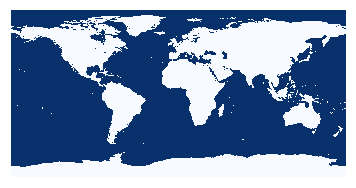

In [10]:
%matplotlib inline
m = Map(coastline_raster)
m.open()
sb.heatmap(m.data, cmap="Blues_r", square=True, vmin=0, vmax=1, yticklabels=False, xticklabels=False, cbar=False)